# Proyecto 3 con KNN 

In [18]:
import pandas as pd
df = pd.read_csv('data.csv')

In [19]:
df = df[::960].copy()
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
960,1325375520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,1325433120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2880,1325490720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,1325548320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4852800,1616874240,55773.37,55845.41,55771.02,55845.41,0.181910,10149.746831,55795.430876
4853760,1616931840,55935.93,55935.93,55908.26,55908.26,0.103950,5811.772923,55909.311433
4854720,1616989440,55446.23,55491.92,55446.23,55490.71,0.480803,26672.323389,55474.564963
4855680,1617047040,57612.03,57612.03,57539.26,57569.75,3.810681,219368.876170,57566.847576


In [20]:
df = df.dropna()

In [21]:
df = df.drop(df.columns[[1,2,3,5,6,7]], axis='columns')
df.rename(columns={"Timestamp": "Date"}, inplace=True)
df

,Date,Close
0,1325317920,4.39
31680,1327218720,6.28
48000,1328197920,6.25
75840,1329868320,4.58
94080,1330962720,4.98
...,...,...
4852800,1616874240,55845.41
4853760,1616931840,55908.26
4854720,1616989440,55490.71
4855680,1617047040,57569.75


In [22]:
from datetime import datetime
listaDate = []
for date in df['Date']:
    listaDate.append(datetime.fromtimestamp(date))
df.index = listaDate

In [26]:
df.index.name="time"
df

,Date,Close
time,,
2011-12-31 08:52:00,1325317920,4.39
2012-01-22 08:52:00,1327218720,6.28
2012-02-02 16:52:00,1328197920,6.25
2012-02-22 00:52:00,1329868320,4.58
2012-03-05 16:52:00,1330962720,4.98
...,...,...
2021-03-27 20:44:00,1616874240,55845.41
2021-03-28 13:44:00,1616931840,55908.26
2021-03-29 05:44:00,1616989440,55490.71


In [29]:
df1 = df.drop(df.columns[[0]], axis='columns')
df1

,Close
time,
2011-12-31 08:52:00,4.39
2012-01-22 08:52:00,6.28
2012-02-02 16:52:00,6.25
2012-02-22 00:52:00,4.58
2012-03-05 16:52:00,4.98
...,...
2021-03-27 20:44:00,55845.41
2021-03-28 13:44:00,55908.26
2021-03-29 05:44:00,55490.71


In [30]:
df1.to_csv('reducido.csv')
#df5 = df4.filter(like = ('2021-01' and '2021-02'), axis=0)
#df5.to_csv("ene_feb_2021",index=True)

In [1]:
import pandas as pd
df2 = pd.read_csv("reducido.csv", delimiter = ",", parse_dates=['time'], index_col='time')
df2

,Close
time,
2011-12-31 08:52:00,4.39
2012-01-22 08:52:00,6.28
2012-02-02 16:52:00,6.25
2012-02-22 00:52:00,4.58
2012-03-05 16:52:00,4.98
...,...
2021-03-27 20:44:00,55845.41
2021-03-28 13:44:00,55908.26
2021-03-29 05:44:00,55490.71


In [2]:
df2.dtypes

Close    float64
dtype: object

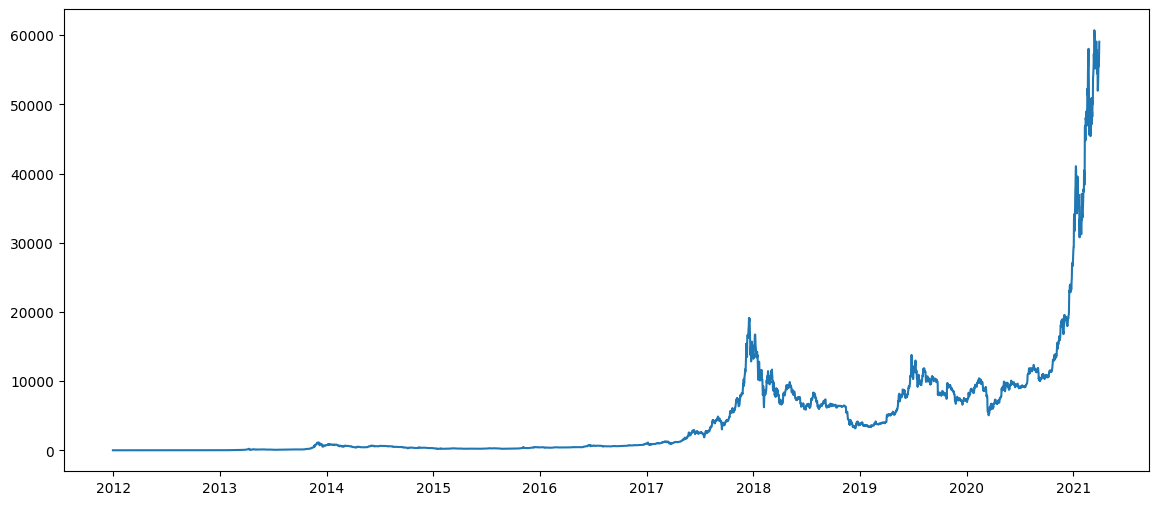

In [3]:
import matplotlib.pyplot as plt

# Forzar gráficos anchos en el notebook de Jupyter
plt.rcParams["figure.figsize"] = (14, 6) # (w, h)

plt.plot(df2)

***

#### En un dataset de valoraciones de Bitcoin, obtener 5 columnas con el delta de los últimos 1, 2, 3, 4 y 5 días.

In [4]:
# Crear 5 columnas con el delta de los últimos 1, 2, 3, 4 y 5 días
for i in range(1, 6):
    df2[f'delta_{i}d'] = df2['Close'].diff(periods=i)
df2

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2011-12-31 08:52:00,4.39,NaN,NaN,NaN,NaN,NaN
2012-01-22 08:52:00,6.28,1.89,NaN,NaN,NaN,NaN
2012-02-02 16:52:00,6.25,-0.03,1.86,NaN,NaN,NaN
2012-02-22 00:52:00,4.58,-1.67,-1.70,0.19,NaN,NaN
2012-03-05 16:52:00,4.98,0.40,-1.27,-1.30,0.59,NaN
...,...,...,...,...,...,...
2021-03-27 20:44:00,55845.41,1087.47,2916.14,3771.39,3875.75,-600.07
2021-03-28 13:44:00,55908.26,62.85,1150.32,2978.99,3834.24,3938.60
2021-03-29 05:44:00,55490.71,-417.55,-354.70,732.77,2561.44,3416.69


In [5]:
# Crear 5 columnas con el delta relativos:
for i in range(1, 6):
    df2[f'delta_relativo_{i}d'] = (df2[f'delta_{i}d']) / (df2['Close'])
df2

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d,delta_relativo_1d,delta_relativo_2d,delta_relativo_3d,delta_relativo_4d,delta_relativo_5d
time,,,,,,,,,,,
2011-12-31 08:52:00,4.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-22 08:52:00,6.28,1.89,NaN,NaN,NaN,NaN,0.300955,NaN,NaN,NaN,NaN
2012-02-02 16:52:00,6.25,-0.03,1.86,NaN,NaN,NaN,-0.004800,0.297600,NaN,NaN,NaN
2012-02-22 00:52:00,4.58,-1.67,-1.70,0.19,NaN,NaN,-0.364629,-0.371179,0.041485,NaN,NaN
2012-03-05 16:52:00,4.98,0.40,-1.27,-1.30,0.59,NaN,0.080321,-0.255020,-0.261044,0.118474,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27 20:44:00,55845.41,1087.47,2916.14,3771.39,3875.75,-600.07,0.019473,0.052218,0.067533,0.069401,-0.010745
2021-03-28 13:44:00,55908.26,62.85,1150.32,2978.99,3834.24,3938.60,0.001124,0.020575,0.053284,0.068581,0.070448
2021-03-29 05:44:00,55490.71,-417.55,-354.70,732.77,2561.44,3416.69,-0.007525,-0.006392,0.013205,0.046160,0.061572


<AxesSubplot: xlabel='time'>

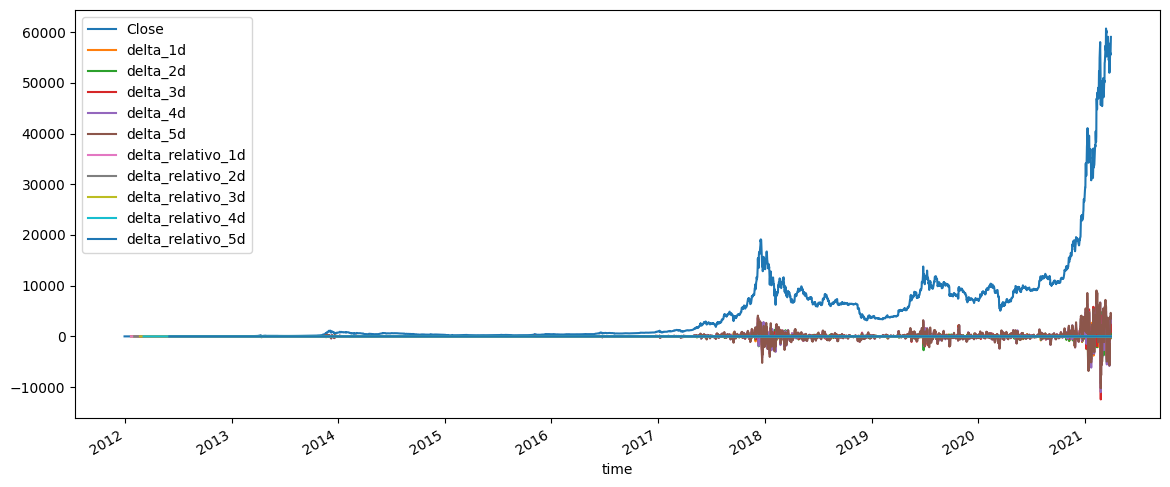

In [6]:
df2.plot()

La valoración tan alta de BTC eclipsa los deltas. Graficamos sólo los deltas:

<AxesSubplot: xlabel='time'>

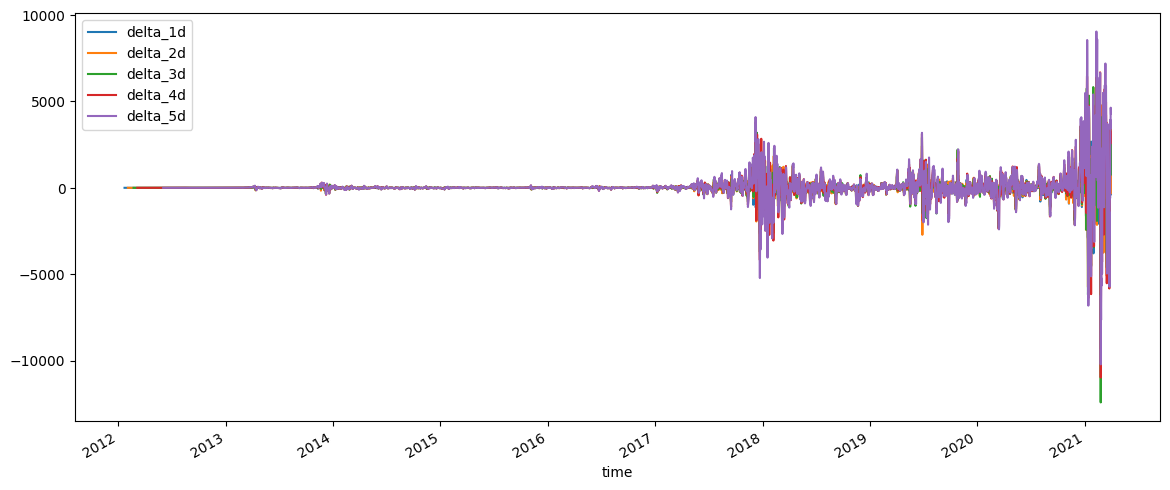

In [7]:
df2[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']].plot()

Graficamos los deltas de forma comparativa con espaciados constantes

Descubriendo zonas de mayor volatilidad, mediante moving average

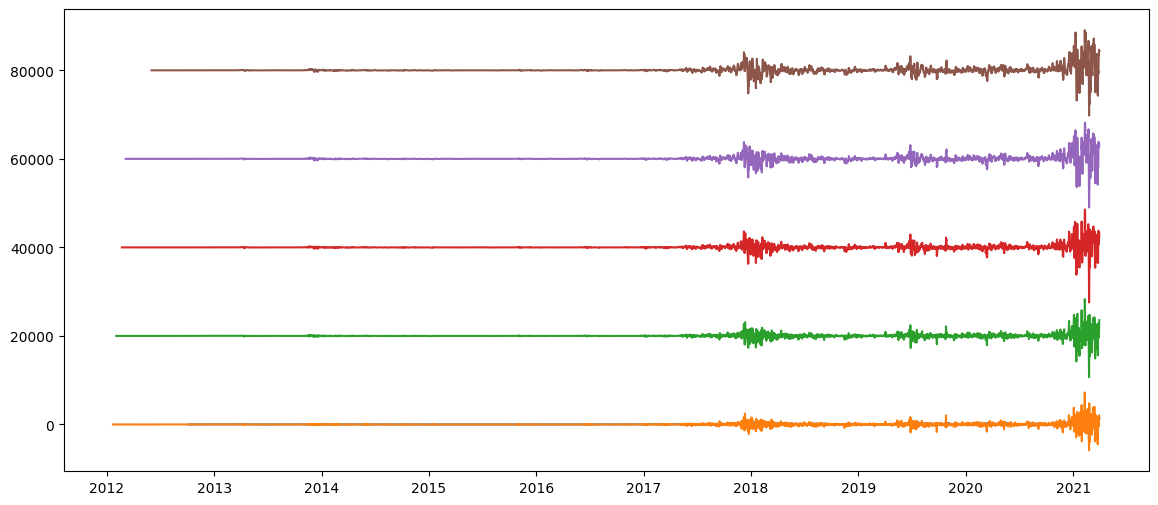

In [8]:
plt.plot(abs(df2[['delta_1d']]).rolling(window=16).mean())
plt.plot(df2[['delta_1d']])
plt.plot(df2[['delta_2d']] + 20000)
plt.plot(df2[['delta_3d']] + 40000)
plt.plot(df2[['delta_4d']] + 60000)
plt.plot(df2[['delta_5d']] + 80000)
plt.show()

Análisis de correlación de los deltas

In [40]:
df2[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']].corr()

,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
delta_1d,1.000000,0.706190,0.559518,0.461906,0.449839
delta_2d,0.706190,1.000000,0.809150,0.677260,0.608593
delta_3d,0.559518,0.809150,1.000000,0.852497,0.751670
delta_4d,0.461906,0.677260,0.852497,1.000000,0.883165
delta_5d,0.449839,0.608593,0.751670,0.883165,1.000000


<AxesSubplot: >

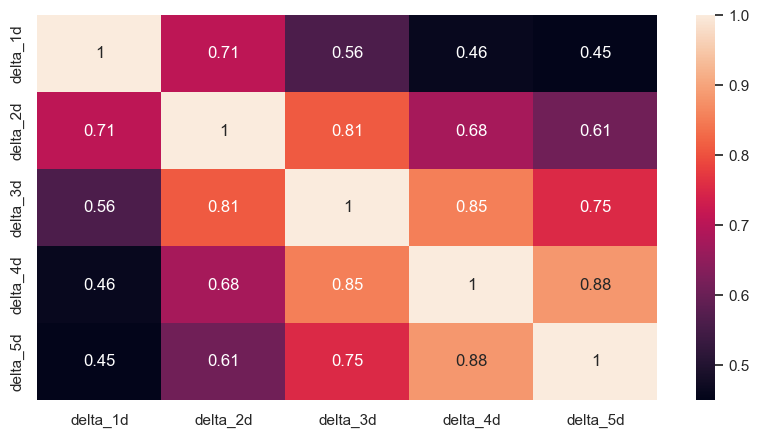

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(df2[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']].corr(), annot=True)

***

#### Buscar en la gráfica 3 fechas de clara tendencia alcista y 3 de bajista.

Alcista: 

In [10]:
# Buscar las 3 fechas con el mayor delta_5d, ordenando por esta columna
btc_sorted = df2.sort_values(by='delta_5d', ascending=False)
btc_sorted[:3]

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d,delta_relativo_1d,delta_relativo_2d,delta_relativo_3d,delta_relativo_4d,delta_relativo_5d
time,,,,,,,,,,,
2021-02-09 04:44:00,46683.99,7239.56,8321.15,7904.58,6240.11,9051.42,0.155076,0.178244,0.169321,0.133667,0.193887
2021-02-11 20:44:00,48044.15,3277.86,1497.38,1132.25,1360.16,8599.72,0.068226,0.031167,0.023567,0.028311,0.178996
2021-01-08 20:44:00,40260.08,2097.94,2797.06,4501.56,6425.75,8560.08,0.052110,0.069475,0.111812,0.159606,0.212620


In [11]:
# Buscar las 3 fechas con el menor delta_5d
btc_sorted[-8:]

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d,delta_relativo_1d,delta_relativo_2d,delta_relativo_3d,delta_relativo_4d,delta_relativo_5d
time,,,,,,,,,,,
2021-01-12 20:44:00,34237.87,-580.36,-637.10,-3562.25,-6386.30,-6819.83,-0.016951,-0.018608,-0.104044,-0.186527,-0.199190
2021-02-25 04:44:00,50372.42,5.87,4772.41,-1060.58,-4536.70,-7652.26,0.000117,0.094743,-0.021055,-0.090063,-0.151914
2021-02-23 20:44:00,45600.01,-5832.99,-9309.11,-12424.67,-10986.71,-10220.17,-0.127916,-0.204147,-0.272471,-0.240937,-0.224126
2011-12-31 08:52:00,4.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-22 08:52:00,6.28,1.89,NaN,NaN,NaN,NaN,0.300955,NaN,NaN,NaN,NaN
2012-02-02 16:52:00,6.25,-0.03,1.86,NaN,NaN,NaN,-0.004800,0.297600,NaN,NaN,NaN
2012-02-22 00:52:00,4.58,-1.67,-1.70,0.19,NaN,NaN,-0.364629,-0.371179,0.041485,NaN,NaN
2012-03-05 16:52:00,4.98,0.40,-1.27,-1.30,0.59,NaN,0.080321,-0.255020,-0.261044,0.118474,NaN


***

#### Crear un dataset de entrenamiento con las 6 fechas encontradas y las 5 columnas de deltas.

In [12]:
# Quito los NaN's
btc_sorted = btc_sorted.dropna()
btc_sorted

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d,delta_relativo_1d,delta_relativo_2d,delta_relativo_3d,delta_relativo_4d,delta_relativo_5d
time,,,,,,,,,,,
2021-02-09 04:44:00,46683.99,7239.56,8321.15,7904.58,6240.11,9051.42,0.155076,0.178244,0.169321,0.133667,0.193887
2021-02-11 20:44:00,48044.15,3277.86,1497.38,1132.25,1360.16,8599.72,0.068226,0.031167,0.023567,0.028311,0.178996
2021-01-08 20:44:00,40260.08,2097.94,2797.06,4501.56,6425.75,8560.08,0.052110,0.069475,0.111812,0.159606,0.212620
2021-02-10 12:44:00,46546.77,-365.13,-137.22,7102.34,8183.93,7767.36,-0.007844,-0.002948,0.152585,0.175822,0.166872
2021-01-09 12:44:00,41057.70,797.62,2895.56,3594.68,5299.18,7223.37,0.019427,0.070524,0.087552,0.129067,0.175932
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13 12:44:00,34596.85,358.98,-221.38,-278.12,-3203.27,-6027.32,0.010376,-0.006399,-0.008039,-0.092588,-0.174216
2021-02-24 12:44:00,50366.55,4766.54,-1066.45,-4542.57,-7658.13,-6220.17,0.094637,-0.021174,-0.090190,-0.152048,-0.123498
2021-01-12 20:44:00,34237.87,-580.36,-637.10,-3562.25,-6386.30,-6819.83,-0.016951,-0.018608,-0.104044,-0.186527,-0.199190


In [13]:
# Dejo sólo las 3 primeras filas y las 3 últimas
# Obtener las 3 primeras filas
btc_sorted_head = btc_sorted.head(3)

# Obtener las 3 últimas filas
btc_sorted_tail = btc_sorted.tail(3)

# Concatenar las primeras y últimas filas
dfTraining = pd.concat([btc_sorted_head, btc_sorted_tail])

dfTraining

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d,delta_relativo_1d,delta_relativo_2d,delta_relativo_3d,delta_relativo_4d,delta_relativo_5d
time,,,,,,,,,,,
2021-02-09 04:44:00,46683.99,7239.56,8321.15,7904.58,6240.11,9051.42,0.155076,0.178244,0.169321,0.133667,0.193887
2021-02-11 20:44:00,48044.15,3277.86,1497.38,1132.25,1360.16,8599.72,0.068226,0.031167,0.023567,0.028311,0.178996
2021-01-08 20:44:00,40260.08,2097.94,2797.06,4501.56,6425.75,8560.08,0.052110,0.069475,0.111812,0.159606,0.212620
2021-01-12 20:44:00,34237.87,-580.36,-637.10,-3562.25,-6386.30,-6819.83,-0.016951,-0.018608,-0.104044,-0.186527,-0.199190
2021-02-25 04:44:00,50372.42,5.87,4772.41,-1060.58,-4536.70,-7652.26,0.000117,0.094743,-0.021055,-0.090063,-0.151914
2021-02-23 20:44:00,45600.01,-5832.99,-9309.11,-12424.67,-10986.71,-10220.17,-0.127916,-0.204147,-0.272471,-0.240937,-0.224126


***

#### Entrenar KNN con este dataset de entrenamiento

In [14]:
import numpy as np

# La etiqueta 1 significará alcista y -1 bajista
labels = np.array(['1','1','1','-1','-1','-1'])
labels

array(['1', '1', '1', '-1', '-1', '-1'], dtype='<U2')

In [15]:
train = np.array(dfTraining[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']])
# train = train.reshape(-1, 1)
train

array([[ 7.239560e+03,  8.321150e+03,  7.904580e+03,  6.240110e+03,
         9.051420e+03],
       [ 3.277860e+03,  1.497380e+03,  1.132250e+03,  1.360160e+03,
         8.599720e+03],
       [ 2.097940e+03,  2.797060e+03,  4.501560e+03,  6.425750e+03,
         8.560080e+03],
       [-5.803600e+02, -6.371000e+02, -3.562250e+03, -6.386300e+03,
        -6.819830e+03],
       [ 5.870000e+00,  4.772410e+03, -1.060580e+03, -4.536700e+03,
        -7.652260e+03],
       [-5.832990e+03, -9.309110e+03, -1.242467e+04, -1.098671e+04,
        -1.022017e+04]])

***

#### Aplica predicción de KNN para determinar la tendencia alcista/bajista en una fecha dada sobre el dataset completo.

In [16]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# inicializar modelo
knn = KNeighborsClassifier(n_neighbors=3)

# entrenar modelo
knn.fit(train, labels)

# evaluar modelo
score = knn.score(train, labels)
print("Precisión del modelo:", score)

Precisión del modelo: 1.0


In [17]:
# Datos de test, todo el dataset
dfTesting = btc_sorted
test = np.array(dfTesting[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']])
test

array([[ 7.239560e+03,  8.321150e+03,  7.904580e+03,  6.240110e+03,
         9.051420e+03],
       [ 3.277860e+03,  1.497380e+03,  1.132250e+03,  1.360160e+03,
         8.599720e+03],
       [ 2.097940e+03,  2.797060e+03,  4.501560e+03,  6.425750e+03,
         8.560080e+03],
       ...,
       [-5.803600e+02, -6.371000e+02, -3.562250e+03, -6.386300e+03,
        -6.819830e+03],
       [ 5.870000e+00,  4.772410e+03, -1.060580e+03, -4.536700e+03,
        -7.652260e+03],
       [-5.832990e+03, -9.309110e+03, -1.242467e+04, -1.098671e+04,
        -1.022017e+04]])

In [19]:
predLabel = knn.predict(test)
predLabel

array(['1', '1', '1', ..., '-1', '-1', '-1'], dtype='<U2')

***

#### Dibuja los valores alcistas de Bitcoin en color azul y los bajistas en color rojo

In [20]:
# Se agrega la predicción como columna nueva en el dataframe
btc_sorted["trend"] = predLabel
btc_sorted

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d,delta_relativo_1d,delta_relativo_2d,delta_relativo_3d,delta_relativo_4d,delta_relativo_5d,trend
time,,,,,,,,,,,,
2021-02-09 04:44:00,46683.99,7239.56,8321.15,7904.58,6240.11,9051.42,0.155076,0.178244,0.169321,0.133667,0.193887,1
2021-02-11 20:44:00,48044.15,3277.86,1497.38,1132.25,1360.16,8599.72,0.068226,0.031167,0.023567,0.028311,0.178996,1
2021-01-08 20:44:00,40260.08,2097.94,2797.06,4501.56,6425.75,8560.08,0.052110,0.069475,0.111812,0.159606,0.212620,1
2021-02-10 12:44:00,46546.77,-365.13,-137.22,7102.34,8183.93,7767.36,-0.007844,-0.002948,0.152585,0.175822,0.166872,1
2021-01-09 12:44:00,41057.70,797.62,2895.56,3594.68,5299.18,7223.37,0.019427,0.070524,0.087552,0.129067,0.175932,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13 12:44:00,34596.85,358.98,-221.38,-278.12,-3203.27,-6027.32,0.010376,-0.006399,-0.008039,-0.092588,-0.174216,-1
2021-02-24 12:44:00,50366.55,4766.54,-1066.45,-4542.57,-7658.13,-6220.17,0.094637,-0.021174,-0.090190,-0.152048,-0.123498,-1
2021-01-12 20:44:00,34237.87,-580.36,-637.10,-3562.25,-6386.30,-6819.83,-0.016951,-0.018608,-0.104044,-0.186527,-0.199190,-1


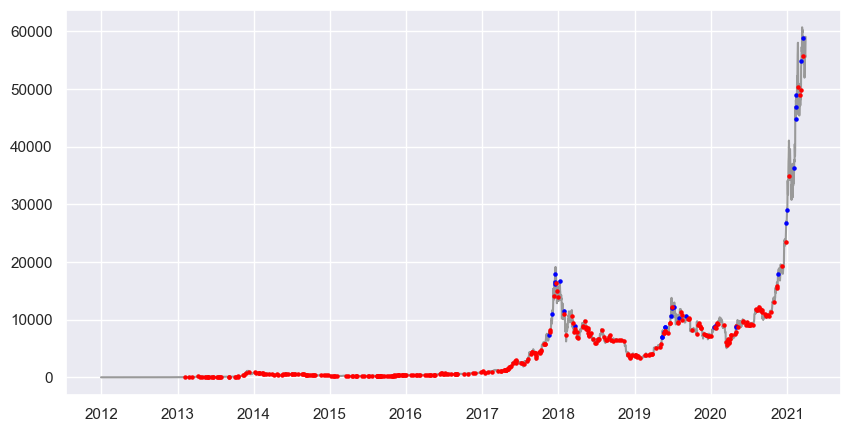

In [21]:
# Dibujar gráfico de dispersión con color que indica la tendencia predicha por KNN

plt.plot(df2["Close"], color="#999", zorder=1) # zorder sirve para que la línea (plot) quede debajo de los puntos (scatter)

# Para hacer que el color de cada punto se base en la columna trend
# hay que asignar un color rojo o azul según el valor de la columna trend
# en cada fila.

# Plot the data
i=0
for time, row in btc_sorted.iterrows():
    i = i + 1
    #Pintar sólo 1 de cada 10
    if i%10 != 0:
        continue
    if row['trend'] == "1":
        plt.scatter(time, row['Close'], color='blue', s=5, zorder=2)
    else:
        plt.scatter(time, row['Close'], color='red', s=5, zorder=2)

plt.show()

In [29]:
df3 = pd.read_csv("reducido.csv", delimiter = ",", parse_dates=['time'], index_col='time')
df3

,Close
time,
2011-12-31 08:52:00,4.39
2012-01-22 08:52:00,6.28
2012-02-02 16:52:00,6.25
2012-02-22 00:52:00,4.58
2012-03-05 16:52:00,4.98
...,...
2021-03-27 20:44:00,55845.41
2021-03-28 13:44:00,55908.26
2021-03-29 05:44:00,55490.71


<function matplotlib.pyplot.show(close=None, block=None)>

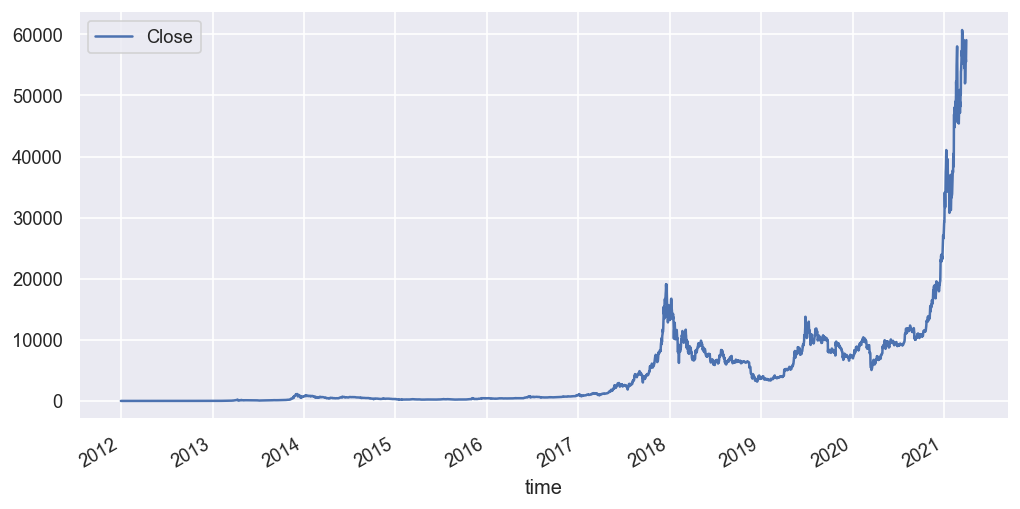

In [30]:
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
df3.plot(kind='line', y='Close')
plt.show

In [34]:
from statsmodels.tsa.arima_model import ARIMA
# Crear el modelo ARIMA
model = ARIMA(df3['Close'], order=(2, 1, 2)) #hiperparámetros
model_fit = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
